<h1>Hypothesis Testing with Men's and Women's Soccer Matches</h1>

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

<h1>Project Instructions</h1>
Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. <b>Use a 10% significance level</b>.

For this analysis, you'll use Official FIFA World Cup matches since 2002-01-01, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called result_dict in the form:

result_dict = {"p_val": p_val, "result": result}

where p_val is the p-value and result is either the string "fail to reject" or "reject", depending on the result of the test.

<h1>Solution Code</h1>

<h3>Importing, and Filtering the Dataset</h3>

In [2]:
# Start your code here!
import pandas as pd

men = pd.read_csv('men_results.csv')
women = pd.read_csv('women_results.csv')

men['total_score'] = men['home_score'] + men['away_score']
women['total_score'] = women['home_score'] + women['away_score']

men_filtered = men[men['tournament'] == 'FIFA World Cup']
men_filtered = men_filtered[men_filtered['date'] >= '2002-01-01']

women_filtered = women[women['tournament'] == 'FIFA World Cup']
women_filtered = women_filtered[women_filtered['date'] >= '2002-01-01']

display(women_filtered)


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_score
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4
...,...,...,...,...,...,...,...,...
4465,4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3
4466,4466,2019-07-02,England,United States,1,2,FIFA World Cup,3
4467,4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1
4468,4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,3


Guide to solve (According to me wehehehe):
- Filter data by date (since `2002-01-01`)
- Use Z-score (?) since you are using only one feature to compare
- Perform hypothesis testing
- Put results and interpret in a dataframe according to instructions

<h2>T-statistics</h2>

<h3>Sample Statistic</h3>

In [3]:
men_mean = men_filtered['total_score'].mean()
men_std = men_filtered['total_score'].std()
men_count = men_filtered['total_score'].count()

women_mean = women_filtered['total_score'].mean()
women_std = women_filtered['total_score'].std()
women_count = women_filtered['total_score'].count()

<h3>Calculating Test Statistics</h3>

In [4]:
import numpy as np

numerator = women_mean - men_mean
denominator = np.sqrt((women_std ** 2 / women_count) + (men_std ** 2 / men_count))
t_stat = numerator/denominator

print(t_stat)

2.812822759620731


<h3>Degrees of Freedom</h3>

In [5]:
degrees_of_freedom = women_count + men_count - 2

print(degrees_of_freedom)

582


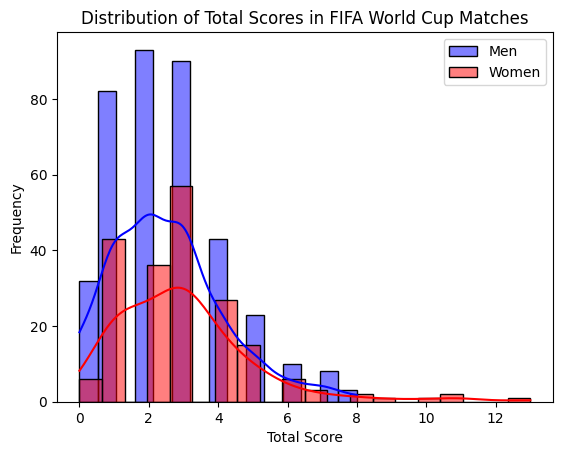

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt

# Plotting the distribution for men
sns.histplot(men_filtered['total_score'], kde=True, color='blue', label='Men')
# Plotting the distribution for women
sns.histplot(women_filtered['total_score'], kde=True, color='red', label='Women')

plt.legend()
plt.title('Distribution of Total Scores in FIFA World Cup Matches')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.show()

As we can see above, the graph of both men and women total scores are skewed, this means they are not normally distributed. So we will use a non-parametric test.

Reminder: 
- The significance level is <b>10% or 0.1</b>
- Since alternative hypothesis looks for 'more', we use right-tailed test

In [7]:
import scipy.stats as stats
import pingouin

ping = pingouin.mwu(x = women_filtered['total_score'],
            y = men_filtered['total_score'],
            alternative = 'greater')

p_value = ping['p-val'].values[0]
print(p_value)

0.005106609825443641


<h2>Analysis</h2>

In [8]:
result_dict = {"p_val": p_value, "result": 'reject'}
print(result_dict)

{'p_val': np.float64(0.005106609825443641), 'result': 'reject'}


Since p-value is less then the significant value, we reject the null hypothesis.